<decorator-gen-201>:4: FutureWarning: NOTE: psd_welch() is a deprecated function. Function ``psd_welch()`` is deprecated; for Raw/Epochs/Evoked instances use ``spectrum = instance.compute_psd(method="welch")`` instead, followed by ``spectrum.get_data(return_freqs=True)``.


ID 1  no VR:  IAFEstimate(PeakAlphaFrequency=9.0, CenterOfGravity=8.75, AlphaBand=(7.0, 10.75))
ID 1  VR:  IAFEstimate(PeakAlphaFrequency=7.75, CenterOfGravity=8.5, AlphaBand=(7.75, 10.5))
ID 2  no VR:  IAFEstimate(PeakAlphaFrequency=11.0, CenterOfGravity=11.5, AlphaBand=(9.5, 13.75))
ID 2  VR:  IAFEstimate(PeakAlphaFrequency=9.25, CenterOfGravity=9.0, AlphaBand=(7.25, 11.25))


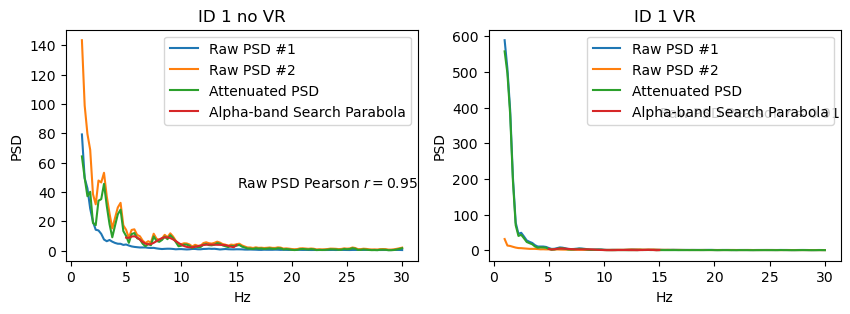

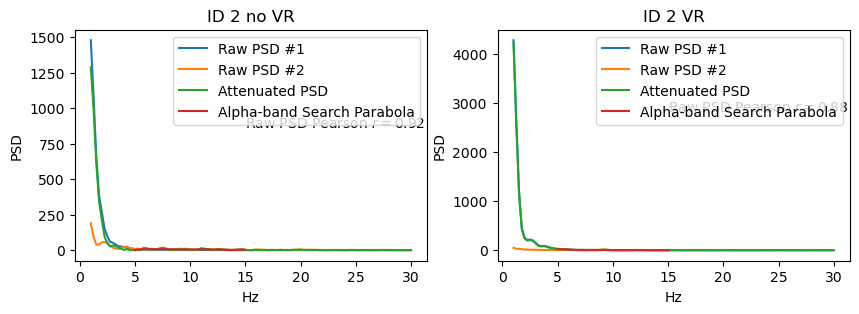

In [1]:
import matplotlib.pyplot as plt
import mne
import philistine
from  Settings import *
from utils import *

mne.set_log_level(False)
mne.utils.set_config('MNE_USE_CUDA', 'true')  
plt.rcParams.update({'figure.max_open_warning': 0})

raw_id1_eyesopen_novr = make_raw("ID101-EEG")
raw_id1_eyesclosed_novr = make_raw("ID103-EEG")
raw_id1_eyesopen_vr = make_raw("ID104-EEG")
raw_id1_eyesclosed_vr = make_raw("ID105-EEG")
raw_id1_eyesclosed2_vr = make_raw("ID107-EEG")

raw_id2_eyesopen_novr = make_raw("ID201-EEG")
raw_id2_eyesclosed_novr = make_raw("ID202-EEG")
raw_id2_eyesopen_vr = make_raw("ID203-EEG")
raw_id2_eyesclosed_vr = make_raw("ID204-EEG")

raws = [[[raw_id1_eyesopen_novr,raw_id1_eyesclosed_novr],[raw_id1_eyesopen_vr,raw_id1_eyesclosed_vr]],
        [[raw_id2_eyesopen_novr,raw_id2_eyesclosed_novr],[raw_id2_eyesopen_vr,raw_id2_eyesclosed_vr]]
       ]

for grp in alpha_ch_groups:    
    for i, subject in enumerate(raws):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))        
        ax1.set_title("ID " + str(i+1) + " no VR")
        ax2.set_title("ID " + str(i+1) + " VR")
        picks =  select_channels_picks(subject[0][0], grp)                                                 
        novr_alpha = philistine.mne.attenuation_iaf([subject[0][0],subject[0][1]], picks=picks, savgol=True, ax=ax1)
        vr_alpha = philistine.mne.attenuation_iaf([subject[1][0],subject[1][1]], picks=picks, savgol=True,ax=ax2)
        print("ID", i+1 , " no VR: ", novr_alpha)
        print("ID", i+1 , " VR: ", vr_alpha)


# id1_vr_alpha_bothclosed = philistine.mne.attenuation_iaf([raw_id1_eyesclosed_vr,raw_id1_eyesclosed2_vr], picks='eeg', savgol=True)
# print("ID1 VR both closed: ", id1_vr_alpha_bothclosed)

#v2_id2_vr_alpha = philistine.mne.savgol_iaf(raw_id2_eyesclosed_novr, picks='eeg')
#print("V2 ID2 no VR eyes open: ", v2_id2_vr_alpha)